# What is the True Normal Human Body Temperature? 

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. But, is this value statistically correct?

<h3>Exercises</h3>

<p>In this exercise, you will analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance.</p>

<p>Answer the following questions <b>in this notebook below and submit to your Github account</b>.</p> 

<ol>
<li>  Is the distribution of body temperatures normal? 
    <ul>
    <li> Although this is not a requirement for the Central Limit Theorem to hold (read the introduction on Wikipedia's page about the CLT carefully: https://en.wikipedia.org/wiki/Central_limit_theorem), it gives us some peace of mind that the population may also be normally distributed if we assume that this sample is representative of the population.
    <li> Think about the way you're going to check for the normality of the distribution. Graphical methods are usually used first, but there are also other ways: https://en.wikipedia.org/wiki/Normality_test
    </ul>
<li>  Is the sample size large? Are the observations independent?
    <ul>
    <li> Remember that this is a condition for the Central Limit Theorem, and hence the statistical tests we are using, to apply.
    </ul>
<li>  Is the true population mean really 98.6 degrees F?
    <ul>
    <li> First, try a bootstrap hypothesis test.
    <li> Now, let's try frequentist statistical testing. Would you use a one-sample or two-sample test? Why?
    <li> In this situation, is it appropriate to use the $t$ or $z$ statistic? 
    <li> Now try using the other test. How is the result be different? Why?
    </ul>
<li>  Draw a small sample of size 10 from the data and repeat both frequentist tests. 
    <ul>
    <li> Which one is the correct one to use? 
    <li> What do you notice? What does this tell you about the difference in application of the $t$ and $z$ statistic?
    </ul>
<li>  At what temperature should we consider someone's temperature to be "abnormal"?
    <ul>
    <li> As in the previous example, try calculating everything using the boostrap approach, as well as the frequentist approach.
    <li> Start by computing the margin of error and confidence interval. When calculating the confidence interval, keep in mind that you should use the appropriate formula for one draw, and not N draws.
    </ul>
<li>  Is there a significant difference between males and females in normal temperature?
    <ul>
    <li> What testing approach did you use and why?
    <li> Write a story with your conclusion in the context of the original problem.
    </ul>
</ol>

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources

+ Information and data sources: http://www.amstat.org/publications/jse/datasets/normtemp.txt, http://www.amstat.org/publications/jse/jse_data_archive.htm
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
%cd C:\Users\Ken\Documents\KenP\Applications-DataScience\SpringboardCourseWork\Section8.3Mini-Projects\1AnalyzeHumanBodyTemperature\EDA_human_temperature

C:\Users\Ken\Documents\KenP\Applications-DataScience\SpringboardCourseWork\Section8.3Mini-Projects\1AnalyzeHumanBodyTemperature\EDA_human_temperature


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv('data/human_body_temperature.csv')

In [5]:
df.head(2)

,temperature,gender,heart_rate
0,99.3,F,68.0
1,98.4,F,81.0


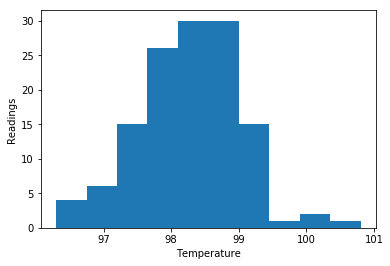

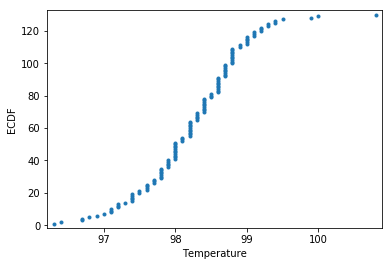

In [12]:
#Question #1 Is the distribution of body temperatures normal? (test for the normality of the distribution)

#Central Limit Theorem (CLT) establishes that, in some situations, when independent random variables are added, their properly normalized
#sum tends toward a normal distribution (informally a "bell curve") even if the original variables themselves 
#are not normally distributed.

#Normality Test is used to determine if a data set is well-modeled by a normal distribution and to compute how likely
#it is for a random variable underlying the data set to be normally distributed.

#Visually look for normal distribution via a histogram - based on the histogram below it appears that temperature tends
#towards a normal distribution.
_= plt.hist(df.temperature)
_= plt.xlabel('Temperature')
_= plt.ylabel('Readings')
plt.show()

#Use the Empirical Cumulative Distribution Function (ECDF) to validate if temperature tends to a normal distribution
#Based on the result below, the temperature tends to a normal distribution because the curve aligns to that of
#normal distribution curve.
x = np.sort(df.temperature)
y = np.arange(1, len(x) + 1/len(x))

_= plt.plot(x,y, marker = '.', linestyle='none')
_= plt.xlabel('Temperature')
_= plt.ylabel('ECDF')
_= plt.margins(0.02)
plt.show()



In [7]:
#Question #2 Is the sample size large? 
#Given that the sample size is only 130 samples and the population is the human population, this is a small sample size

#Question #2 Are the observations independent?
#The observations are independent because each observation is a person's body temperature. Since it is "each person",
#the body temperature of that person is not dependent on the body temperature of another person.


In [8]:
#Question #3 Is the true population mean really 98.6 degrees F?
#Bootstrap hypothesis test.

#Hypothesis statement: H0: u = 98.6
#Alternate hypothesis: H1: u <> 98.6

#Since the calculated p-value (see below) is 0.0 and 0 < 98.6, reject the null hypothesis. So the true population
#mean is not 98.6

In [9]:
#3a - function used for question #3 below 
def bootstrap_replicate_1d(data,func):
    bs_sample = np.random.choice(data,size=len(data))
    return func(bs_sample)

In [10]:
#3a - second function used for question #3 below
def draw_bs_reps(data, func, size=10000):
    """Draw bootstrap replicates."""

    # Initialize array of replicates: bs_replicates
    bs_replicates = np.empty(size)

    # Generate replicates
    for i in range(size):
        bs_replicates[i] = bootstrap_replicate_1d(data,func)

    return bs_replicates

In [15]:
#Question #3a - calculate p-value via bootstrapping

# Make an array of translated impact forces: translated_force_b
temperature_translated = df.temperature - np.mean(df.temperature) + 98.6

# Take bootstrap replicates of the sample's temperatures
bs_replicates = draw_bs_reps(temperature_translated, np.mean, 10000)

# Compute fraction of replicates that are less than the observed temperature: p
p = np.sum(bs_replicates <= np.mean(df.temperature)) / 10000

# Print the p-value
print('p = ', p)

p =  0.0


In [ ]:
#3b and 3c: Using frequentist statistical testing.  Would you use a one-sample or two-sample test? Why?
# I would use a one-sample test because by definition The one sample t-test is a statistical procedure used to
#determine whether a sample of observations could have been generated by a process with a specific mean.
#For example, suppose you are interested in determining whether an assembly line produces laptop computers
#that weigh five pounds.

In [17]:
#3d: calculate p-value using a t-test
#H0: u = 98.6
#H1: u <> 98.6

#df.describe() provides a sample mean of 98.2 and std dev of 0.73 for temperature for 130 samples

# t-test formula is: mean - testvalue/(std dev/sqrt(samplesize))

In [20]:
numerator = 98.2 - 98.6

denominator = 0.73/np.sqrt(130)

t_test_value = numerator/denominator

print(t_test_value)

-6.2475365758855546


In [ ]:
#4 Draw a small sample of size 10 from the data and repeat both frequentist tests.
Which one is the correct one to use?
What do you notice? What does this tell you about the difference in application of the  t  and  z  statistic?

In [24]:
df_ten = df.head(10)
df_ten

,temperature,gender,heart_rate
0,99.3,F,68.0
1,98.4,F,81.0
2,97.8,M,73.0
3,99.2,F,66.0
4,98.0,F,73.0
5,99.2,M,83.0
6,98.0,M,71.0
7,98.8,M,78.0
8,98.4,F,84.0
9,98.6,F,86.0


In [25]:
#4
df_ten.describe()

,temperature,heart_rate
count,10.000000,10.000000
mean,98.570000,76.300000
std,0.545792,7.056124
min,97.800000,66.000000
25%,98.100000,71.500000
50%,98.500000,75.500000
75%,99.100000,82.500000
max,99.300000,86.000000


In [26]:
#4 as a t-test

#H0: u = 98.6
#H1: u <> 98.6

#t-test formula is: mean - testvalue/(std dev/sqrt(samplesize))
numerator = 98.5 - 98.6

denominator = 0.54/np.sqrt(10)

t_test_value = numerator/denominator

print(t_test_value)


-0.5856069741052222


In [27]:
#4 as a z-test

#H0: u = 98.6
#H1: u <> 98.6

#z-test formula is the same as the t-test formula
numerator = 98.5 - 98.6

denominator = 0.54/np.sqrt(10)

z_test_value = numerator/denominator

print(z_test_value)


-0.5856069741052222


In [ ]:
#4 as a z-test:
#In the z table a value of -0.58 has a value of 0.7190

#probability = 1 - 0.7190 = 0.281

#

In [35]:
#5 At what temperature should we consider someone's temperature to be "abnormal"?
#As in the previous example, try calculating everything using the boostrap approach, as well as the frequentist approach.
#Start by computing the margin of error and confidence interval. When calculating the confidence interval, 
#keep in mind that you should use the appropriate formula for one draw, and not N draws.

#p for margin of error is the number in the sample > 98.5/sample size

count_over = df.temperature[df.temperature > 98.5].count()
total_count = df.temperature.count()

p = count_over/total_count
print(p)

0.3769230769230769


In [40]:
#5 Margin of error formula is sqrt(p(1-p)/samplesize)
margin_of_error = np.sqrt(0.38 * (1-0.38)/130)
margin_of_error

0.0425712073155988

In [42]:
#5 Confidence Interval

#df.describe() gives a mean of 98.2 and a std dev of 0.73

#Using a confidence level of 95% so z = 1.96